In [33]:
import numpy as np
import pandas as pd
from sklearn.model_selection import *
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from xgboost import XGBClassifier
from nltk.text import *
from nltk.corpus import stopwords

import matplotlib.pyplot as plt
%matplotlib inline

#### Read German and English articles into different variables

In [34]:
count = 1
german_strs = []
english_strs = []
with open("english_german_articles.txt","r",encoding="utf-8") as f:
    for line in f.readlines():
        if(count <= 90):
            german_strs.append(line)
        else:
            english_strs.append(line)
        count = count + 1

In [35]:
print(len(german_strs))
print(len(english_strs))

90
90


In [36]:
splitter = ", \"name\": "
print(splitter)

, "name": 


#### Gather English and German stopwords

In [37]:
en_stop_words = stopwords.words('english')
ge_stop_words = stopwords.words('german')
stop_words = ge_stop_words + en_stop_words
print(len(stop_words)," ",stop_words)

410   ['aber', 'alle', 'allem', 'allen', 'aller', 'alles', 'als', 'also', 'am', 'an', 'ander', 'andere', 'anderem', 'anderen', 'anderer', 'anderes', 'anderm', 'andern', 'anderr', 'anders', 'auch', 'auf', 'aus', 'bei', 'bin', 'bis', 'bist', 'da', 'damit', 'dann', 'der', 'den', 'des', 'dem', 'die', 'das', 'daß', 'derselbe', 'derselben', 'denselben', 'desselben', 'demselben', 'dieselbe', 'dieselben', 'dasselbe', 'dazu', 'dein', 'deine', 'deinem', 'deinen', 'deiner', 'deines', 'denn', 'derer', 'dessen', 'dich', 'dir', 'du', 'dies', 'diese', 'diesem', 'diesen', 'dieser', 'dieses', 'doch', 'dort', 'durch', 'ein', 'eine', 'einem', 'einen', 'einer', 'eines', 'einig', 'einige', 'einigem', 'einigen', 'einiger', 'einiges', 'einmal', 'er', 'ihn', 'ihm', 'es', 'etwas', 'euer', 'eure', 'eurem', 'euren', 'eurer', 'eures', 'für', 'gegen', 'gewesen', 'hab', 'habe', 'haben', 'hat', 'hatte', 'hatten', 'hier', 'hin', 'hinter', 'ich', 'mich', 'mir', 'ihr', 'ihre', 'ihrem', 'ihren', 'ihrer', 'ihres', 'euch'

In [38]:
ge_labels = ['ge'] * len(german_strs)
en_labels = ['en'] * len(english_strs)

In [39]:
#scratchpad -ignore
var1 = 'master of \u00d6 \u0103 \u00e4 \u017e \u00a0 the'
print(repr(var1))
print(str(var1))

'master of Ö ă ä ž \xa0 the'
master of Ö ă ä ž   the


In [40]:
#scratchpad -ignore
text=u"""Europython 2005
G\u00f6teborg, Sweden
\u8463\u5049\u696d
Hotel rates 100\N{euro sign}
"""

import codecs 

def printu(ustr):
    print(ustr.encode('raw_unicode_escape'))
    
def saveu(ustr, filename='output2.txt'):
    open(filename,'wb').write(codecs.BOM_UTF8 + ustr.encode('utf8'))

saveu(text)

In [41]:
all_articles = german_strs + english_strs
all_labels = ge_labels + en_labels

#### Create DataFrame with all articles and labels

In [42]:
all_df = pd.DataFrame({"article":all_articles,'label':all_labels})

In [43]:
print(all_df.head())
print(all_df.tail())

                                             article label
0  \u201eWikipedia, Die freie Enzyklop\u00e4die\u...    ge
1  Nachfolgend befindet sich der f\u00fcr Wikiped...    ge
2  Dieses ist die Datenschutz-Erkl\u00e4rung von ...    ge
3  Wikipedia ist ein Projekt zum Aufbau einer Enz...    ge
4  Mit der Buchfunktion kannst du ein Buch aus be...    ge
                                               article label
175  A modular connector is an electrical connector...    en
176  Ethernet /\u02c8i\u02d0\u03b8\u0259rn\u025bt/ ...    en
177  Digital Equipment Corporation, also known as D...    en
178  October 1 is the 274th day of the year (275th ...    en
179  September 29 is the 272nd day of the year (273...    en


In [44]:
rand_no = 12345
score_param = 'accuracy'

In [45]:
all_df = all_df.sample(frac=1,random_state=rand_no)
print(all_df.shape)

(180, 2)


#### Split data into 72:18:10 ratios for train:validation:test datasets

In [46]:
X_train,X_test,y_train,y_test = train_test_split(all_df['article'],all_df['label'],test_size = 0.1, random_state= rand_no)

In [47]:
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size = 0.2, random_state= rand_no)

In [48]:
print(X_train.shape," - ", y_train.shape)
print(X_val.shape ," - ", y_val.shape)
print(X_test.shape," - ", y_test.shape)

(129,)  -  (129,)
(33,)  -  (33,)
(18,)  -  (18,)


#### Vectorize the datasets

In [49]:
vectorizer = TfidfVectorizer(
    ngram_range=(1, 4),
    stop_words=stop_words,
    min_df=8,
    max_df=50,
    lowercase=True,
    strip_accents='ascii')
X_train_matrix = vectorizer.fit_transform(X_train).toarray()
X_val_matrix = vectorizer.transform(X_val).toarray()
X_test_matrix = vectorizer.transform(X_test).toarray()

/opt/anaconda3/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:286: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['fur', 'konnen', 'konnte', 'uber', 'wahrend', 'wurde', 'wurden'] not in stop_words.
  sorted(inconsistent))


In [50]:
print(X_train_matrix.shape)
print(X_val_matrix.shape)
print(X_test_matrix.shape)
print(vectorizer.idf_.shape)

(129, 1371)
(33, 1371)
(18, 1371)
(1371,)


#### Utility function to fit the model, predict metrics

In [51]:
models = []
scores = []
train_preds = None
val_preds= None

    #main method to fit a model,do predictions and print metrics
def predictModelMetrics(model,model_name):
    train_preds,val_preds = resetPreds()
    train_preds,val_preds = doPredict(model,model_name)
    printMetrics(model,train_preds,val_preds)
     
    #reset prediction variables before running next model
def resetPreds():
    train_preds = None
    val_preds = None
    return train_preds,val_preds

    #make predictions
def doPredict(model,model_name):
    model.fit(X_train_matrix,y_train)
    train_preds = model.predict(X_train_matrix)
    val_preds = model.predict(X_val_matrix)
    models.append(model_name)
    return train_preds,val_preds

    #prints and captures metrics
def printMetrics(model,train_preds,val_preds):
    print("Train Accuracy: %.2f"%accuracy_score(y_train,train_preds))
    
    #k-fold with k=5
    val_scores = cross_val_score(model,X_val_matrix,y_val, cv=5, scoring=score_param)
    cv_score = val_scores.mean()
    print("Cross Validation Accuracy: %.2f" %cv_score)
    
    print("-------------------------------------")
    print("Confusion Matrix:")
    print(pd.crosstab(y_val,val_preds,rownames=['Actual'],colnames=['Predicted'],margins=True))
    #print(classification_report(y_val,val_preds))
    scores.append(round(cv_score,2))
    
    #print summary of model accuracies
def summarizeResults():
    results = pd.DataFrame({"Model":models, "Score":scores})
    print(results)

In [52]:
#Scratchpad -ignore
val1 = None
val2 = None
def init():
    val1 = [10,20,30]
    val2 = [100,200,300]
    return val1,val2

val1,val2 = init()
print(val1, val2)

[10, 20, 30] [100, 200, 300]


#### Naive Bayes

In [53]:
nbayes = GaussianNB()
predictModelMetrics(nbayes,"Naive Bayes")

Train Accuracy: 0.99
Cross Validation Accuracy: 0.97
-------------------------------------
Confusion Matrix:
Predicted  en  ge  All
Actual                
en         17   1   18
ge          0  15   15
All        17  16   33


#### Logistic Regression

In [54]:
logistic_reg = LogisticRegression(solver='liblinear',penalty='l1')
predictModelMetrics(logistic_reg, "Logistic Regression")

Train Accuracy: 0.92
Cross Validation Accuracy: 0.67
-------------------------------------
Confusion Matrix:
Predicted  en  ge  All
Actual                
en         17   1   18
ge          2  13   15
All        19  14   33


#### Finding optimal k value

In [55]:
mean_errors =[]
k_range = range(1,50)
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_matrix,y_train)
    pred_i = knn.predict(X_val_matrix)
    mean_errors.append(np.mean(y_val != pred_i))
    

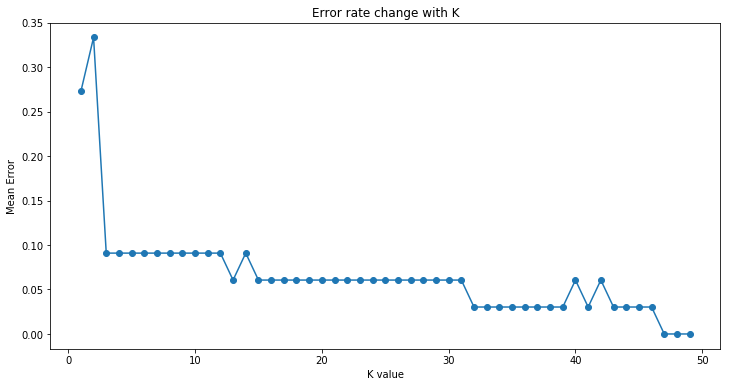

In [56]:
plt.figure(figsize=(12,6))
plt.title("Error rate change with K")
plt.plot(k_range,mean_errors,marker='o')
plt.xlabel("K value")
plt.ylabel("Mean Error");

#### k=3 is the better value with high decrease in error

In [57]:
knn = KNeighborsClassifier(n_neighbors=5)
predictModelMetrics(knn,"KNN")

Train Accuracy: 0.98
Cross Validation Accuracy: 0.91
-------------------------------------
Confusion Matrix:
Predicted  en  ge  All
Actual                
en         17   1   18
ge          2  13   15
All        19  14   33


#### SVC Model

In [58]:
param_grid = {"C":np.arange(0.001,2,0.1),
              "gamma":np.arange(0.001,2,0.1),
             "kernel":['linear','rbf','sigmoid']}

In [59]:
svc = SVC(C=1, gamma=1, kernel='rbf')
random_cv = RandomizedSearchCV(
    svc, cv=10, param_distributions=param_grid, n_iter=10, 
    scoring=score_param,iid= False)

In [60]:
predictModelMetrics(random_cv,"SVC")

Train Accuracy: 0.99
Cross Validation Accuracy: 0.85
-------------------------------------
Confusion Matrix:
Predicted  en  ge  All
Actual                
en         16   2   18
ge          1  14   15
All        17  16   33


In [61]:
random_cv.best_params_

{'C': 1.101, 'gamma': 1.601, 'kernel': 'linear'}

In [62]:
#manually tune parameters as GridSearch is taking lot of time
xgbc = XGBClassifier(max_depth=5,learning_rate=0.01,n_estimators=600)
predictModelMetrics(xgbc,"XGBoost Classifier")

Train Accuracy: 0.97
Cross Validation Accuracy: 0.76
-------------------------------------
Confusion Matrix:
Predicted  en  ge  All
Actual                
en         18   0   18
ge          3  12   15
All        21  12   33


In [63]:
summarizeResults()

                 Model  Score
0          Naive Bayes   0.97
1  Logistic Regression   0.67
2                  KNN   0.91
3                  SVC   0.85
4   XGBoost Classifier   0.76


#### Run the KNN which gives high Cross Validation accuracy on test data

In [64]:
test_preds = knn.predict(X_test_matrix)
#cv_score = cross_val_score(knn,X_test_matrix,y_test,scoring='accuracy',cv=5).mean()
#print("CV on test:%.2f"%cv_score)
test_score = accuracy_score(y_test,test_preds)
print("Accuracy Score on test:%.2f"%test_score)

Accuracy Score on test:1.00
